In [11]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

import pytesseract

from os import listdir
from os.path import isfile, join
import imutils
import warnings 
warnings.filterwarnings("ignore")

from utils_non_blind import Preprocess, Image_adjustment
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
image = 1
mypath = '../data/imagesprojets5/photo/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

img_file = onlyfiles[4]
origin_file = '../data/imagesprojets5/originals/image_1.jpg' #original image

img = cv2.imread(mypath + img_file) #reading the image
origin = cv2.imread(origin_file) #reading the original image

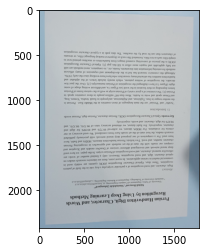

In [13]:
plt.imshow(img)

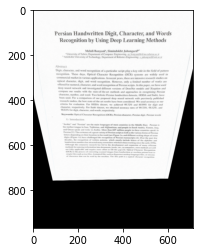

In [14]:
##### Preprocessing
preprocessor = Preprocess(img, origin)
result = preprocessor.remove_shadows()
result, origin = preprocessor.rescaling(result)
result

### Adjusting image 
image_adjustor = Image_adjustment(result, origin)
matches, kp1, kp2 = image_adjustor.detect_matches()
aligned_image = image_adjustor.align_image(matches, kp1, kp2)

plt.imshow(aligned_image)

In [15]:
im_tesseract = aligned_image.copy()

In [16]:
d = pytesseract.image_to_data(im_tesseract, output_type=pytesseract.Output.DICT)

Text(0.5, 1.0, 'Text and distances extracted using pytesseract')

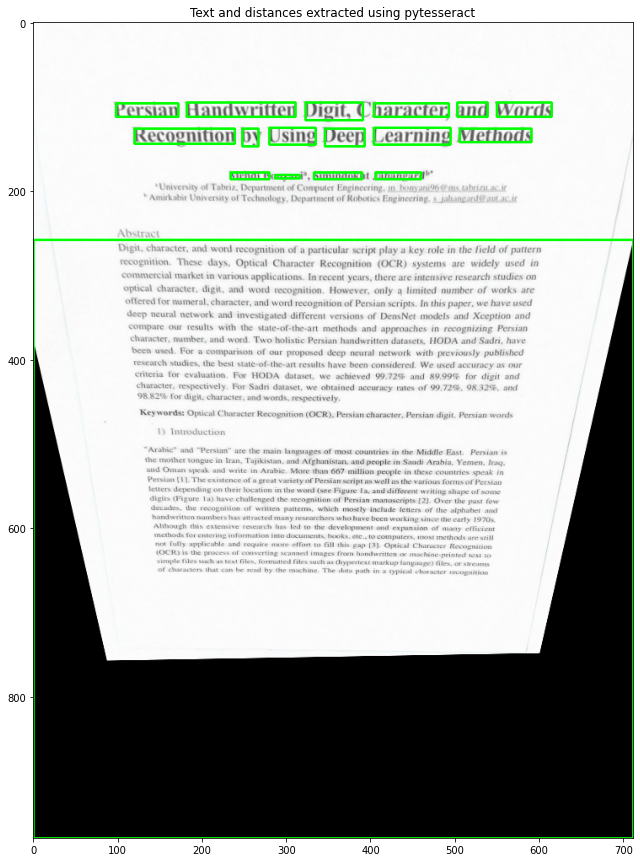

In [17]:
plt.rcParams["figure.figsize"] = [20,15]

n_boxes = len(d['level'])
level = 5
words_coords = []
for i in range(n_boxes):
    if d['level'][i] == level:
        word = {}
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        word['x'] = x
        word['y'] = y
        word['w'] = w
        word['h'] = h
        word['text'] = d['text'][i]
        words_coords.append(word)
        cv2.rectangle(im_tesseract, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.imshow(im_tesseract)
plt.title('Text and distances extracted using pytesseract')